In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Sales_History.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        421570 non-null  int64  
 1   Dept         421570 non-null  int64  
 2   Date         421570 non-null  object 
 3   Total_Sales  421570 non-null  float64
 4   IsHoliday    421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
df["Date"]=pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        421570 non-null  int64         
 1   Dept         421570 non-null  int64         
 2   Date         421570 non-null  datetime64[ns]
 3   Total_Sales  421570 non-null  float64       
 4   IsHoliday    421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [7]:
df.isnull().sum()

Store          0
Dept           0
Date           0
Total_Sales    0
IsHoliday      0
dtype: int64

In [44]:
df["Date"]

0        2017-05-02
1        2017-12-02
2        2017-02-19
3        2017-02-26
4        2017-05-03
            ...    
421565   2019-09-29
421566   2019-06-10
421567   2019-10-13
421568   2019-10-20
421569   2019-10-27
Name: Date, Length: 421570, dtype: datetime64[ns]

In [8]:
ts=df.groupby(["Store","Date"]).agg({"Total_Sales":"sum"}).reset_index()

In [9]:
ts.head()

,Store,Date,Total_Sales
0,1,2017-01-10,1453329.50
1,1,2017-02-04,1594968.28
2,1,2017-02-07,1492418.14
3,1,2017-02-19,1611968.17
4,1,2017-02-26,1409727.59


In [10]:
df1=pd.read_csv("Business_Data.csv")

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store              8190 non-null   int64  
 1   Date               8190 non-null   object 
 2   Temperature        8190 non-null   float64
 3   Fuel_Price         8190 non-null   float64
 4   MarkDown1          4032 non-null   float64
 5   MarkDown2          2921 non-null   float64
 6   MarkDown3          3613 non-null   float64
 7   MarkDown4          3464 non-null   float64
 8   MarkDown5          4050 non-null   float64
 9   CPI                7605 non-null   float64
 10  Unemployment_Rate  7605 non-null   float64
 11  Holiday            8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
df1["Date"]=pd.to_datetime(df1["Date"])

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              8190 non-null   int64         
 1   Date               8190 non-null   datetime64[ns]
 2   Temperature        8190 non-null   float64       
 3   Fuel_Price         8190 non-null   float64       
 4   MarkDown1          4032 non-null   float64       
 5   MarkDown2          2921 non-null   float64       
 6   MarkDown3          3613 non-null   float64       
 7   MarkDown4          3464 non-null   float64       
 8   MarkDown5          4050 non-null   float64       
 9   CPI                7605 non-null   float64       
 10  Unemployment_Rate  7605 non-null   float64       
 11  Holiday            8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [14]:
df1[["Store","Date"]]

,Store,Date
0,1,2017-05-02
1,1,2017-12-02
2,1,2017-02-19
3,1,2017-02-26
4,1,2017-05-03
...,...,...
8185,45,2020-06-28
8186,45,2020-05-07
8187,45,2020-12-07
8188,45,2020-07-19


In [15]:
df1["Date"][34]==ts["Date"][0] and df1["Store"][34]==ts["Store"][0]

True

In [16]:
df2=df1.merge(ts,how="left")

In [17]:
df2[df2["Store"]==2]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales
182,2,2017-05-02,40.19,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,2136989.46
183,2,2017-12-02,38.49,2.548,NaN,NaN,NaN,NaN,NaN,210.897994,8.324,True,2137809.50
184,2,2017-02-19,39.69,2.514,NaN,NaN,NaN,NaN,NaN,210.945160,8.324,False,2124451.54
185,2,2017-02-26,46.10,2.561,NaN,NaN,NaN,NaN,NaN,210.975957,8.324,False,1865097.27
186,2,2017-05-03,47.17,2.625,NaN,NaN,NaN,NaN,NaN,211.006754,8.324,False,1991013.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2,2020-06-28,85.37,3.495,8638.45,2457.32,9.00,4713.20,9079.05,NaN,NaN,False,NaN
360,2,2020-05-07,79.48,3.422,11651.46,4984.50,2024.67,15196.91,2862.06,NaN,NaN,False,NaN
361,2,2020-12-07,85.41,3.400,7527.10,1244.78,84.18,2626.70,3881.66,NaN,NaN,False,NaN
362,2,2020-07-19,79.16,3.556,3313.12,723.52,94.85,1224.91,2471.69,NaN,NaN,False,NaN


In [18]:
Markdown=[]
for i in range(0,len(df2["MarkDown1"])):
    if df2["MarkDown1"][i]>=0 or df2["MarkDown2"][i]>=0 or df2["MarkDown3"][i]>=0 or df2["MarkDown4"][i]>=0 or df2["MarkDown5"][i]>=0:
        x="Yes"
        Markdown.append(x)
    elif df2["MarkDown1"][i]<0 or df2["MarkDown2"][i]<0 or df2["MarkDown3"][i]<0 or df2["MarkDown4"][i]<=0 or df2["MarkDown5"][i]<0:
        x="Yes"
        Markdown.append(x)
    else:
        x="No"
        Markdown.append(x)

In [19]:
df2["Markdown"]=Markdown

In [20]:
df2.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4158
MarkDown2            5269
MarkDown3            4577
MarkDown4            4726
MarkDown5            4140
CPI                   585
Unemployment_Rate     585
Holiday                 0
Total_Sales          1755
Markdown                0
dtype: int64

In [21]:
df2.sort_values(by="Date",ascending=True,inplace=True)

In [22]:
df2["CPI"].fillna(method="ffill",inplace=True)

In [23]:
df2.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4158
MarkDown2            5269
MarkDown3            4577
MarkDown4            4726
MarkDown5            4140
CPI                     0
Unemployment_Rate     585
Holiday                 0
Total_Sales          1755
Markdown                0
dtype: int64

In [25]:
df2["Unemployment_Rate"].fillna(method="ffill",inplace=True)

In [26]:
df2.loc[[3809],["Unemployment_Rate"]]

,Unemployment_Rate
3809,6.108


In [64]:
df2.isnull().sum()

Store                   0
Date                    0
Temperature             0
Fuel_Price              0
MarkDown1            4158
MarkDown2            5269
MarkDown3            4577
MarkDown4            4726
MarkDown5            4140
CPI                   401
Unemployment_Rate     401
Holiday                 0
Total_Sales          1755
Markdown                0
dtype: int64

In [65]:
st=pd.read_csv("Store_Details.csv",encoding='windows-1254')

In [66]:
st.head(5)

,Store,Type,Address,Area_Code,Location,Size
0,1,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
1,2,E-Commerce Fulfillment,"1000 Commerce Ave, Atwater, California",95301,Bayfair Cente,202307
2,3,Food,"15555 East 14th Street, San Leandro, California",94578,Capitola Mal,37392
3,4,E-Commerce Fulfillment,"1855 41st Avenue, Capitola, California",95010,Chino Spectrum Marketplace & Towne Cente,205863
4,5,Food,"3800-4046 Grand Ave.& 3801-4097 Grand Ave., Ch...",91710,Eagle Rock Plaz,34875


In [67]:
df2=df2.merge(st,how="left")

In [68]:
df2.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment_Rate,Holiday,Total_Sales,Markdown,Type,Address,Area_Code,Location,Size
0,8,2017-01-10,68.70,2.603,NaN,NaN,NaN,NaN,NaN,215.031003,6.433,False,804105.49,No,E-Commerce Fulfillment,"1200 Auto Park Way, Escondido, California",92029,Falcon Ridge Town Cente,155078
1,32,2017-01-10,66.14,2.759,NaN,NaN,NaN,NaN,NaN,190.673824,9.137,False,1061089.56,No,E-Commerce Fulfillment,"Sunnyvale Avenue, Sunnyvale, California",94086,Terra Vista Town Cente,203007
2,40,2017-01-10,62.01,2.717,NaN,NaN,NaN,NaN,NaN,132.756800,5.287,False,891152.33,No,E-Commerce Fulfillment,"I-80 at Nut Tree Parkway and Harbison Drive, V...",95687,Vintage Oaks At Novat,155083
3,1,2017-01-10,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,False,1453329.50,No,E-Commerce Fulfillment,"1893 W Malvern Ave, Fullerton, California",92835,Applegate Ranch Shopping Cente,151315
4,17,2017-01-10,60.07,2.853,NaN,NaN,NaN,NaN,NaN,126.234600,6.885,False,829207.27,No,Food,"500 Lakewood Center Mall, Lakewood, California",90712,Menifee Countryside Marketplac,93188


In [69]:
df2.dtypes

Store                         int64
Date                 datetime64[ns]
Temperature                 float64
Fuel_Price                  float64
MarkDown1                   float64
MarkDown2                   float64
MarkDown3                   float64
MarkDown4                   float64
MarkDown5                   float64
CPI                         float64
Unemployment_Rate           float64
Holiday                        bool
Total_Sales                 float64
Markdown                     object
Type                         object
Address                      object
Area_Code                     int64
Location                     object
Size                          int64
dtype: object

In [70]:
df2["Month"]=df2["Date"].dt.month
df2["Year"]=df2["Date"].dt.year

In [71]:
cat=df2[["Store","Markdown","Type","Holiday","Year","Month"]]

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

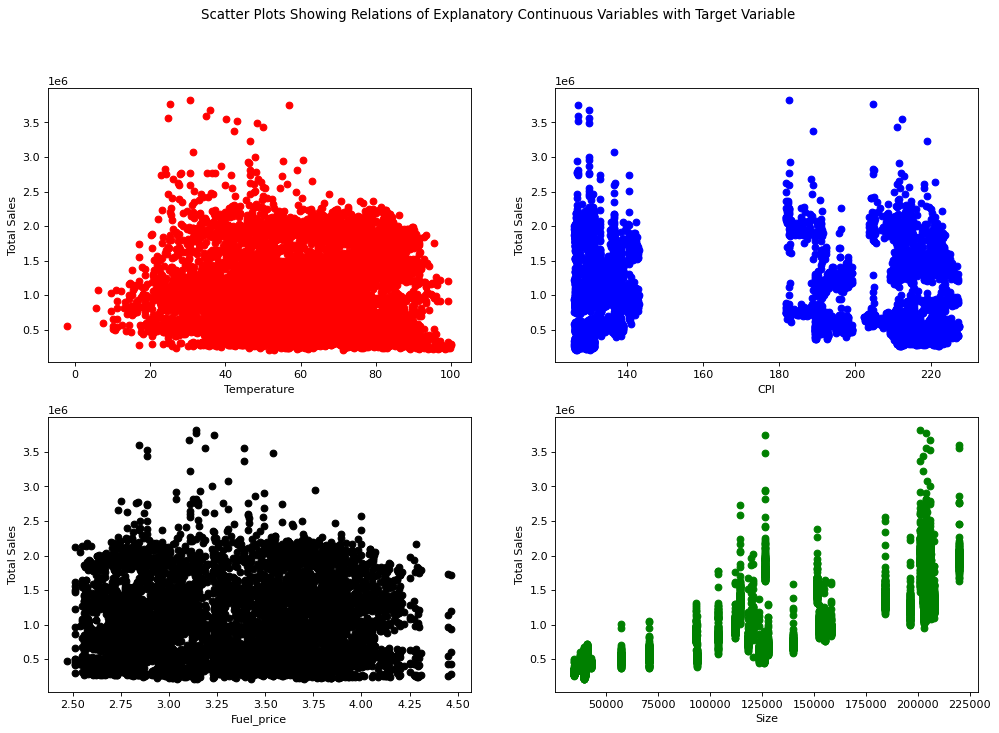

In [101]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10),dpi=80)
axs[0,0].scatter(df2["Temperature"],df2["Total_Sales"],c="r")
axs[0,0].set_xlabel("Temperature")
axs[0,0].set_ylabel("Total Sales")
axs[0,1].scatter(df2["CPI"],df2["Total_Sales"],c="b")
axs[0,1].set_xlabel("CPI")
axs[0,1].set_ylabel("Total Sales")
axs[1,0].scatter(df2["Fuel_Price"],df2["Total_Sales"],c="k")
axs[1,0].set_xlabel("Fuel_price")
axs[1,0].set_ylabel("Total Sales")
axs[1,1].scatter(df2["Size"],df2["Total_Sales"],c="g")
axs[1,1].set_xlabel("Size")
axs[1,1].set_ylabel("Total Sales")
plt.suptitle("Scatter Plots Showing Relations of Explanatory Continuous Variables with Target Variable")
plt.show()

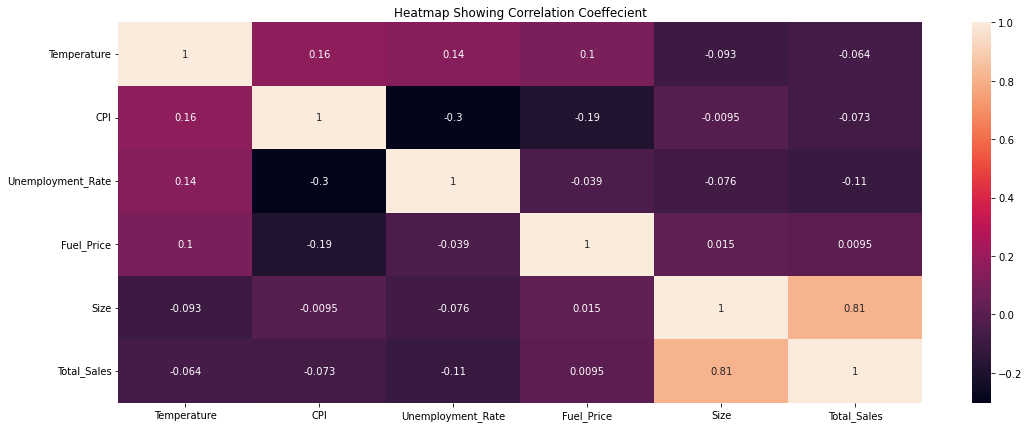

In [36]:
plt.figure(figsize=(18,7))
sns.heatmap(df2[["Temperature","CPI","Unemployment_Rate","Fuel_Price","Size"]+["Total_Sales"]].corr(),annot=True)
plt.title("Heatmap Showing Correlation Coeffecient")

plt.show()

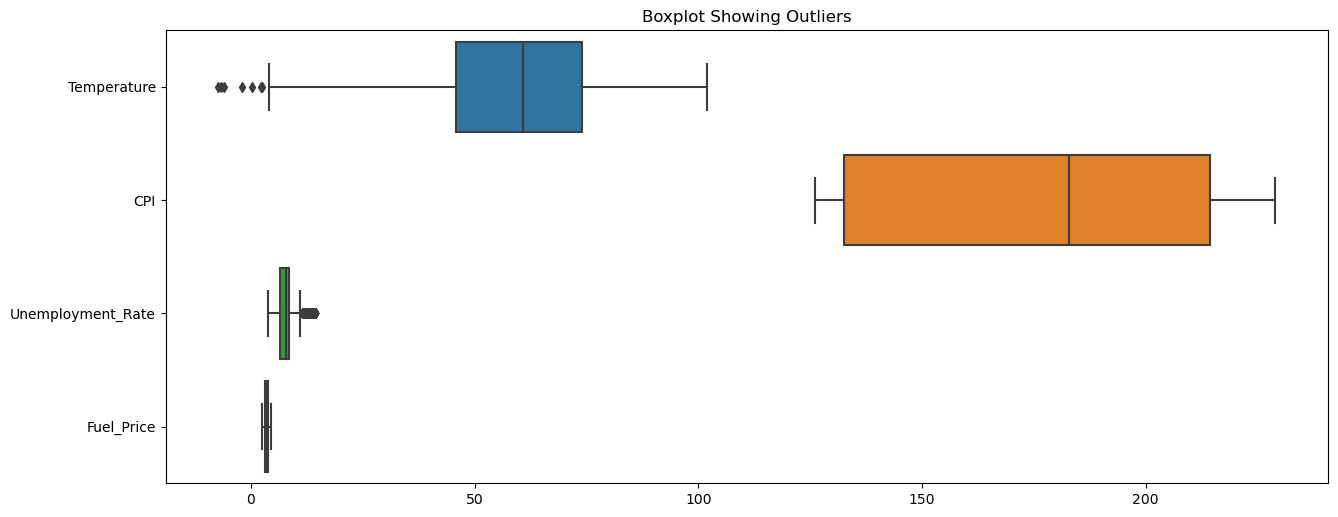

In [39]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df2[["Temperature","CPI","Unemployment_Rate","Fuel_Price"]],orient='h')
plt.title("Boxplot Showing Outliers")

plt.show()

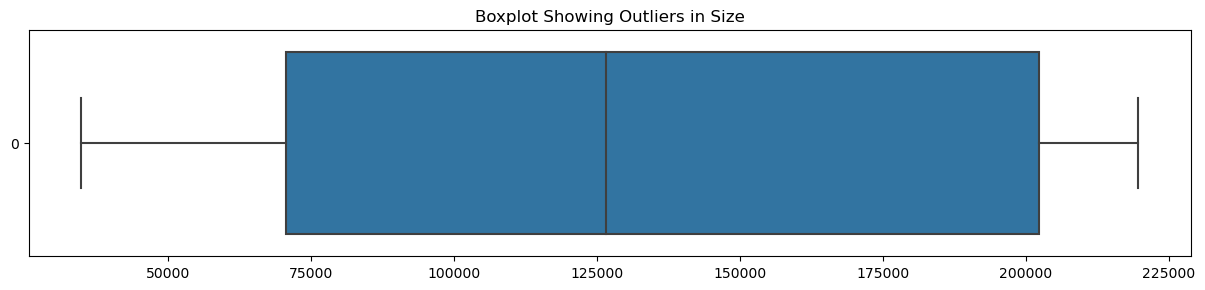

In [40]:
plt.figure(figsize=(15,3),dpi=100)
sns.boxplot(data=df2["Size"],orient='h')
plt.title("Boxplot Showing Outliers in Size")

plt.show()

In [41]:
quantile1,quantile3=np.percentile(df2["Temperature"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

115.84625 3.936249999999994


In [42]:
for i in range(0,len(df2["Temperature"])):
    if df2.loc[i,"Temperature"]>upperbound:
               df2.loc[i,"Temperature"]=upperbound
    elif df2.loc[i,"Temperature"]<lowerbound:
               df2.loc[i,"Temperature"]=lowerbound

In [43]:
quantile1,quantile3=np.percentile(df2["Unemployment_Rate"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

11.57 3.5620000000000007


In [44]:
for i in range(0,len(df2["Unemployment_Rate"])):
    if df2.loc[i,"Unemployment_Rate"]>upperbound:
               df2.loc[i,"Unemployment_Rate"]=upperbound
    elif df2.loc[i,"Unemployment_Rate"]<lowerbound:
               df2.loc[i,"Unemployment_Rate"]=lowerbound

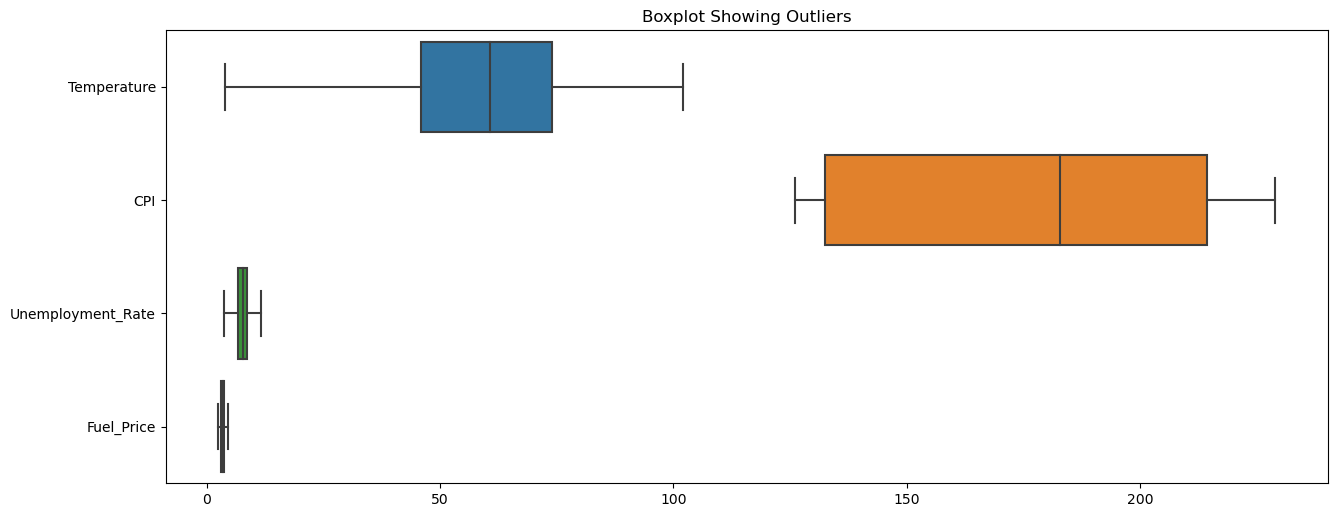

In [45]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df2[["Temperature","CPI","Unemployment_Rate","Fuel_Price"]],orient='h')
plt.title("Boxplot Showing Outliers")

plt.show()

# Box Cox

In [44]:
from scipy import stats

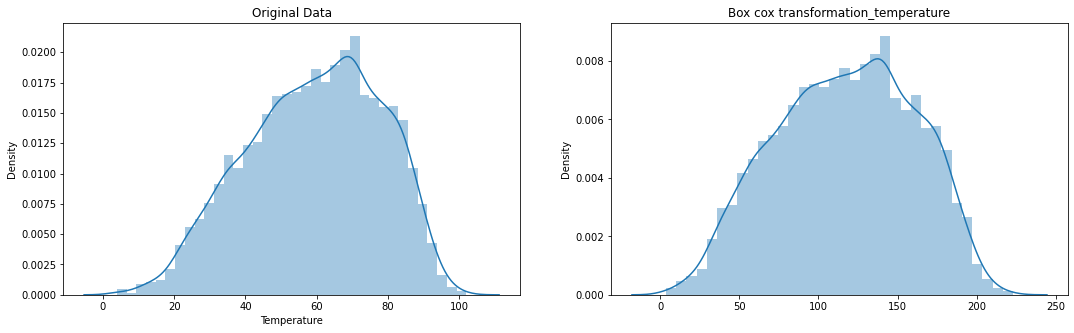

In [45]:
fitted_TP,fitted_lambda=stats.boxcox(df2["Temperature"])
fig, ax = plt.subplots(1, 2,figsize=(18,5))
sns.distplot(df2["Temperature"],ax=ax[0]).set(title="Original Data")
sns.distplot(fitted_TP,ax=ax[1]).set(title="Transformed Data")
plt.title("Box cox transformation_temperature")
plt.show()

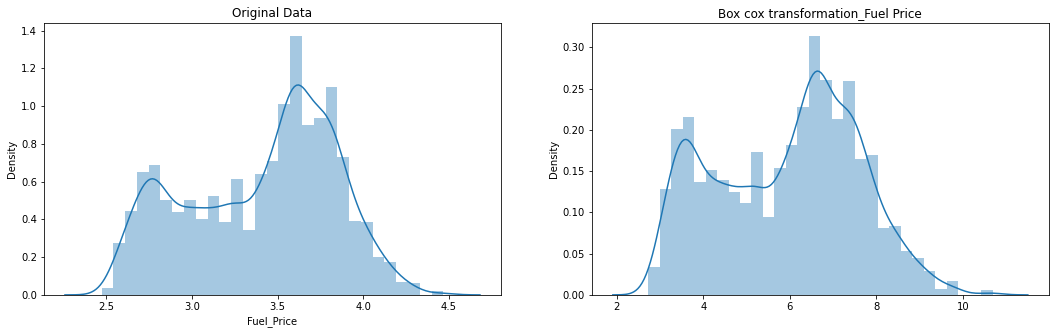

In [46]:
fitted_FP,fitted_lambda=stats.boxcox(df2["Fuel_Price"])
fig, ax = plt.subplots(1, 2,figsize=(18,5))
sns.distplot(df2["Fuel_Price"],ax=ax[0]).set(title="Original Data")
sns.distplot(fitted_FP,ax=ax[1]).set(title="Transformed Data")
plt.title("Box cox transformation_Fuel Price")

plt.show()

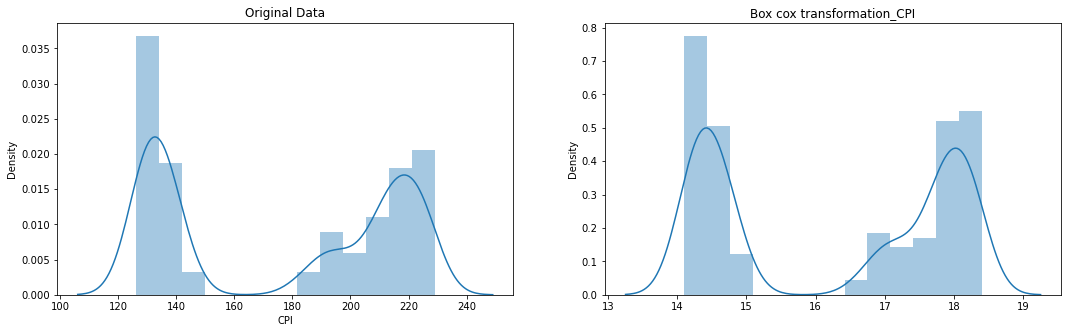

In [47]:
fitted_CPI,fitted_lambda=stats.boxcox(df2["CPI"])
fig, ax = plt.subplots(1, 2,figsize=(18,5))
sns.distplot(df2["CPI"],ax=ax[0]).set(title="Original Data")
sns.distplot(fitted_CPI,ax=ax[1]).set(title="Transformed Data")
plt.title("Box cox transformation_CPI")

plt.show()

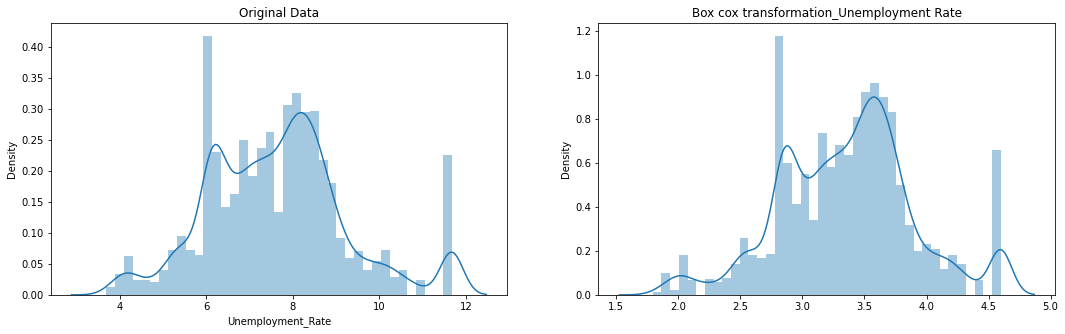

In [48]:
fitted_UR,fitted_lambda=stats.boxcox(df2["Unemployment_Rate"])
fig, ax = plt.subplots(1, 2,figsize=(18,5))
sns.distplot(df2["Unemployment_Rate"],ax=ax[0]).set(title="Original Data")
sns.distplot(fitted_UR,ax=ax[1]).set(title="Transformed Data")
plt.title("Box cox transformation_Unemployment Rate")

plt.show()

In [49]:
df2["Unemployment_Rate"]=pd.DataFrame(fitted_UR)
df2["CPI"]=pd.DataFrame(fitted_CPI)
df2["Fuel_Price"]=pd.DataFrame(fitted_FP)
df2["Temperature"]=pd.DataFrame(fitted_TP)

In [50]:
cont=df2[["Temperature","Fuel_Price","CPI","Unemployment_Rate","Size"]]

In [51]:
df3=pd.get_dummies(df2,columns=list(cat.columns))
df3.columns

Index(['Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment_Rate',
       'Total_Sales', 'Address', 'Area_Code', 'Location', 'Size', 'Store_1',
       'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7',
       'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45', 'Markdown_No', 'Markdown_Yes',
       'Type_E-Commerce Fulfillment', 'Type_Food', 'Type_Regional',
       'Holiday_False', 'Holiday_True', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Mont

# Dropping columns Area_code,Location & Address since these are captured in Store Id

In [52]:
df3.drop(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Area_Code","Location","Address"],axis=1,inplace=True)

In [53]:
df3.head(3)

,Date,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,Store_1,Store_2,Store_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2017-01-10,137.925057,3.093524,17.904962,2.962961,804105.49,155078,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-10,131.685853,3.559673,16.978795,3.870478,1061089.56,203007,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-10,121.728231,3.431208,14.434692,2.516616,891152.33,155083,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlation amongst Continuous Variables

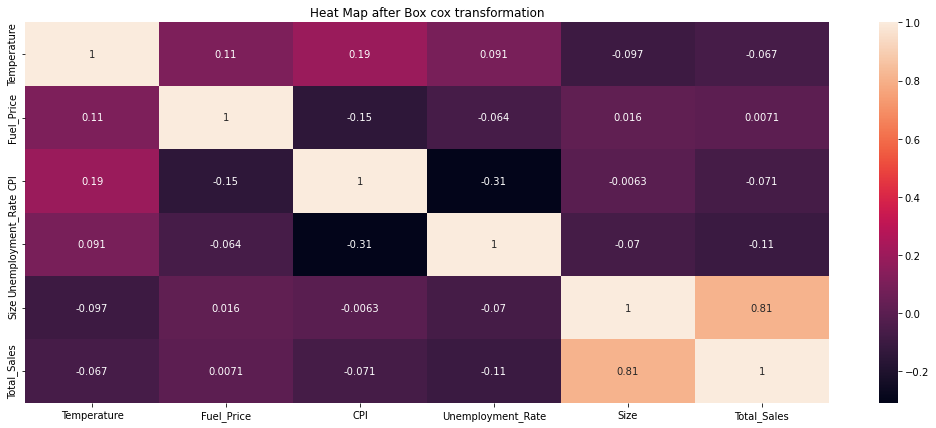

In [54]:
plt.figure(figsize=(18,7))
sns.heatmap(df3[list(cont.columns)+["Total_Sales"]].corr(),annot=True)
plt.title("Heat Map after Box cox transformation")

plt.show()

# Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
cont_sc=sc.fit_transform(cont)
print(pd.DataFrame(cont_sc))

             0         1         2         3         4
0     0.612354  0.046293  0.883587  0.416968  0.650636
1     0.583928  0.104891  0.668555  0.740746  0.910066
2     0.538563  0.088742  0.077882  0.257724  0.650663
3     0.648088  0.046293  0.854857  0.592716  0.630267
4     0.517470  0.142031  0.002016  0.475565  0.315637
...        ...       ...       ...       ...       ...
8185  0.733182  0.494065  0.194937  0.653669  0.898651
8186  0.715518  0.589201  0.194937  0.653669  0.914461
8187  0.825266  0.385762  0.194937  0.653669  0.569925
8188  0.714946  0.510362  0.194937  0.653669  0.458367
8189  0.887934  0.559641  0.194937  0.653669  0.026063

[8190 rows x 5 columns]


In [56]:
df3["Temperature"]=pd.DataFrame(cont_sc)[0]
df3["Fuel_Price"]=pd.DataFrame(cont_sc)[1]
df3["CPI"]=pd.DataFrame(cont_sc)[2]
df3["Unemployment_Rate"]=pd.DataFrame(cont_sc)[3]
df3["Size"]=pd.DataFrame(cont_sc)[4]

In [57]:
df3.head(5)

,Date,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,Store_1,Store_2,Store_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2017-01-10,0.612354,0.046293,0.883587,0.416968,804105.49,0.650636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-10,0.583928,0.104891,0.668555,0.740746,1061089.56,0.910066,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-10,0.538563,0.088742,0.077882,0.257724,891152.33,0.650663,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-10,0.648088,0.046293,0.854857,0.592716,1453329.50,0.630267,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-10,0.517470,0.142031,0.002016,0.475565,829207.27,0.315637,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df3.rename(columns={"Type_E-Commerce Fulfillment":"Type_ECommerceFulfillment"},inplace=True)

In [59]:
cat2=df3.drop(["Date","Temperature","CPI","Unemployment_Rate","Size","Fuel_Price","Total_Sales"],axis=1)

In [60]:
cat2.shape

(8190, 68)

In [61]:
cat2.columns

Index(['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
       'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24',
       'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30',
       'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42',
       'Store_43', 'Store_44', 'Store_45', 'Markdown_No', 'Markdown_Yes',
       'Type_ECommerceFulfillment', 'Type_Food', 'Type_Regional',
       'Holiday_False', 'Holiday_True', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

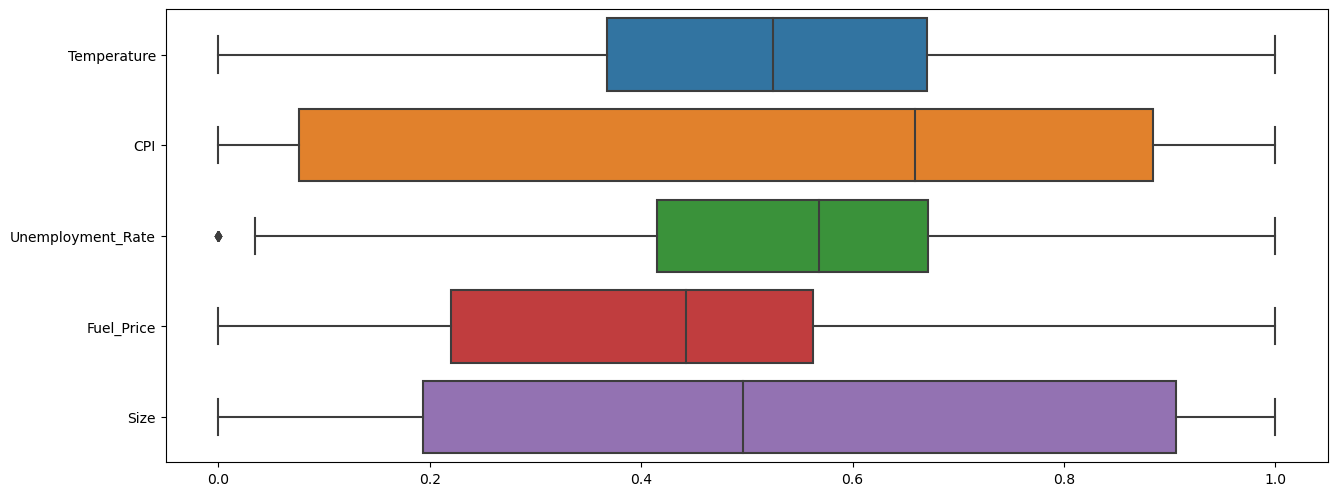

In [63]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df3[["Temperature","CPI","Unemployment_Rate","Fuel_Price","Size"]],orient='h')

plt.show()

In [63]:
quantile1,quantile3=np.percentile(df3["Unemployment_Rate"],(25,75))
iqr=quantile3-quantile1
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

1.0570416080407212 0.02980627128841301


In [64]:
for i in range(0,len(df3["Unemployment_Rate"])):
    if df3.loc[i,"Unemployment_Rate"]>upperbound:
               df3.loc[i,"Unemployment_Rate"]=upperbound
    elif df3.loc[i,"Unemployment_Rate"]<lowerbound:
               df3.loc[i,"Unemployment_Rate"]=lowerbound

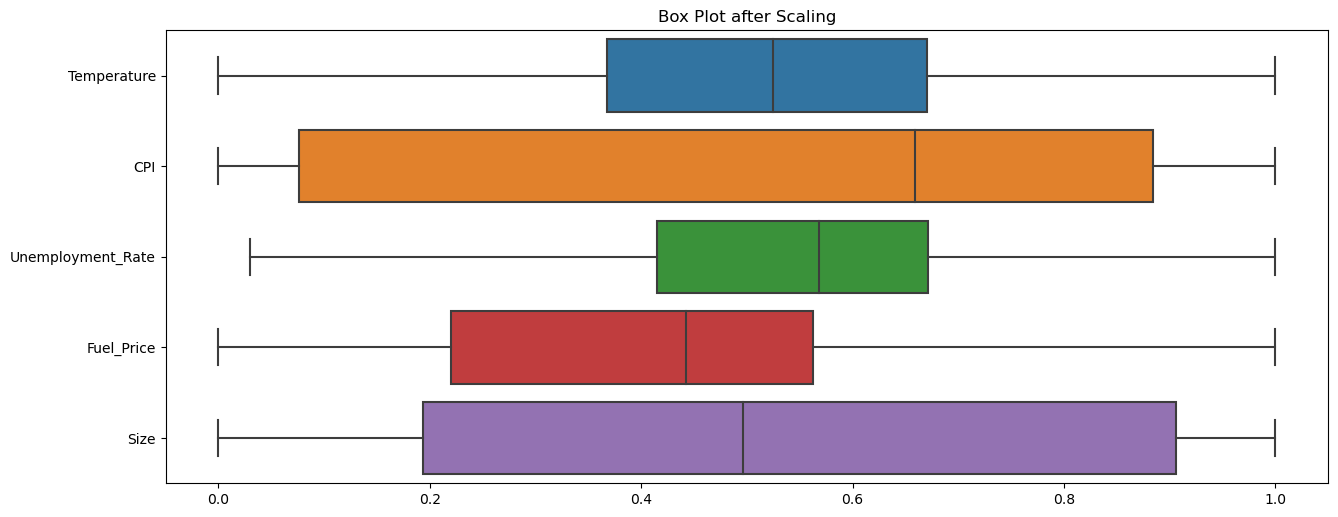

In [65]:
plt.figure(figsize=(15,6),dpi=100)
sns.boxplot(data=df3[["Temperature","CPI","Unemployment_Rate","Fuel_Price","Size"]],orient='h')
plt.title("Box Plot after Scaling")
plt.savefig("10.jpg",orientation='landscape')
plt.show()

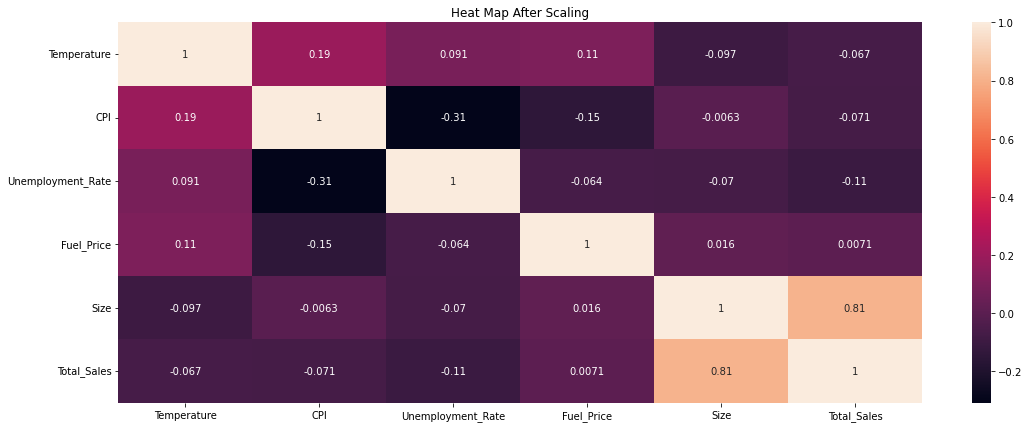

In [66]:
plt.figure(figsize=(18,7))
sns.heatmap(df3[["Temperature","CPI","Unemployment_Rate","Fuel_Price","Size","Total_Sales"]].corr(),annot=True)
plt.title("Heat Map After Scaling")

plt.show()

In [68]:
l1=[]
for i in range(0,len(cat2.columns)):
    pred=cat2.columns[i]
    new=ols('Total_Sales~'+ cat2.columns[i],data=df3).fit()
    an=sm.stats.anova_lm(new,typ=2)
    
    if an.loc[pred]["PR(>F)"]<0.05:
        l1.append(pred)

print(l1)

['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_19', 'Store_20', 'Store_21', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Markdown_No', 'Markdown_Yes', 'Type_ECommerceFulfillment', 'Type_Food', 'Type_Regional', 'Holiday_False', 'Holiday_True', 'Month_1', 'Month_11', 'Month_12']


C:\Users\PRATIM\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


In [68]:
l1=[]
for i in range(0,len(cat2.columns)):
    pred=cat2.columns[i]
    new=ols('Total_Sales~'+ cat2.columns[i],data=df3).fit()
    an=sm.stats.anova_lm(new,typ=2)
    
    if an.loc[pred]["PR(>F)"]<0.05:
        l1.append(pred)

print(l1)

['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_19', 'Store_20', 'Store_21', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Markdown_No', 'Markdown_Yes', 'Type_ECommerceFulfillment', 'Type_Food', 'Type_Regional', 'Holiday_False', 'Holiday_True', 'Month_1', 'Month_11', 'Month_12']


C:\Users\PRATIM\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


In [69]:
len(l1)

49

In [70]:
l1.remove("Markdown_No")
l1.remove("Holiday_False")

In [71]:
print(l1)

['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_19', 'Store_20', 'Store_21', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Markdown_Yes', 'Type_ECommerceFulfillment', 'Type_Food', 'Type_Regional', 'Holiday_True', 'Month_1', 'Month_11', 'Month_12']


In [72]:
validation_set=df3[df3["Total_Sales"].isna()]
validation_set.shape

(1755, 75)

In [73]:
train_set=df3[df3["Total_Sales"].notna()]
train_set.shape

(6435, 75)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Linear Regression

In [75]:
lr=LinearRegression()

In [76]:
len(df3[df3["Date"].dt.year==2019])

2340

In [77]:
len(validation_set[validation_set["Date"].dt.year==2019]) # No.of Miising Values in Total Sales in year 2019 thereby breaking the sequence 

405

In [78]:
len(train_set[train_set["Date"].dt.year==2019])

1935

# NOTE: WE ARE NOT SETTING 'SHUFFLE' AS 'TRUE' SINCE MANY OF THE MISSING FIGURES IN 'TOTAL SALES' LIE CHRONOLOGICALLY IN BETWEEN THE TRAIN SET DATA

In [79]:
from sklearn.model_selection import train_test_split
x=train_set[l1+["Size"]]
y=train_set[["Total_Sales"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=22)

In [80]:
x_train.columns

Index(['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_13',
       'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_19', 'Store_20',
       'Store_21', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28',
       'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_35',
       'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_41', 'Store_42',
       'Store_43', 'Store_44', 'Store_45', 'Markdown_Yes',
       'Type_ECommerceFulfillment', 'Type_Food', 'Type_Regional',
       'Holiday_True', 'Month_1', 'Month_11', 'Month_12', 'Size'],
      dtype='object')

In [81]:
len(x.columns)

48

In [82]:
results=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
round(metrics.r2_score(y_test.values,y_pred),2)

0.93

In [83]:
round(metrics.mean_absolute_percentage_error(y_test.values,y_pred),2)

0.09

In [84]:
X=validation_set[l1+["Size"]]
ans=lr.predict(X)

In [85]:
validation_set["Total_Sales"]=ans
validation_set.head(5)

,Date,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,Store_1,Store_2,Store_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
4545,2019-01-12,0.484708,0.476885,0.062609,0.853595,303680.0,0.026063,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4546,2019-01-12,0.194224,0.403468,0.748898,0.559004,490560.0,0.193984,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4547,2019-01-12,0.287620,0.546654,0.141714,0.742278,458624.0,0.318073,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4548,2019-01-12,0.298070,0.688237,0.186462,0.611858,1690560.0,0.916437,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4549,2019-01-12,0.399149,0.294358,0.985491,0.233626,828800.0,0.650636,0,0,0,...,0,0,0,0,0,0,0,0,0,0


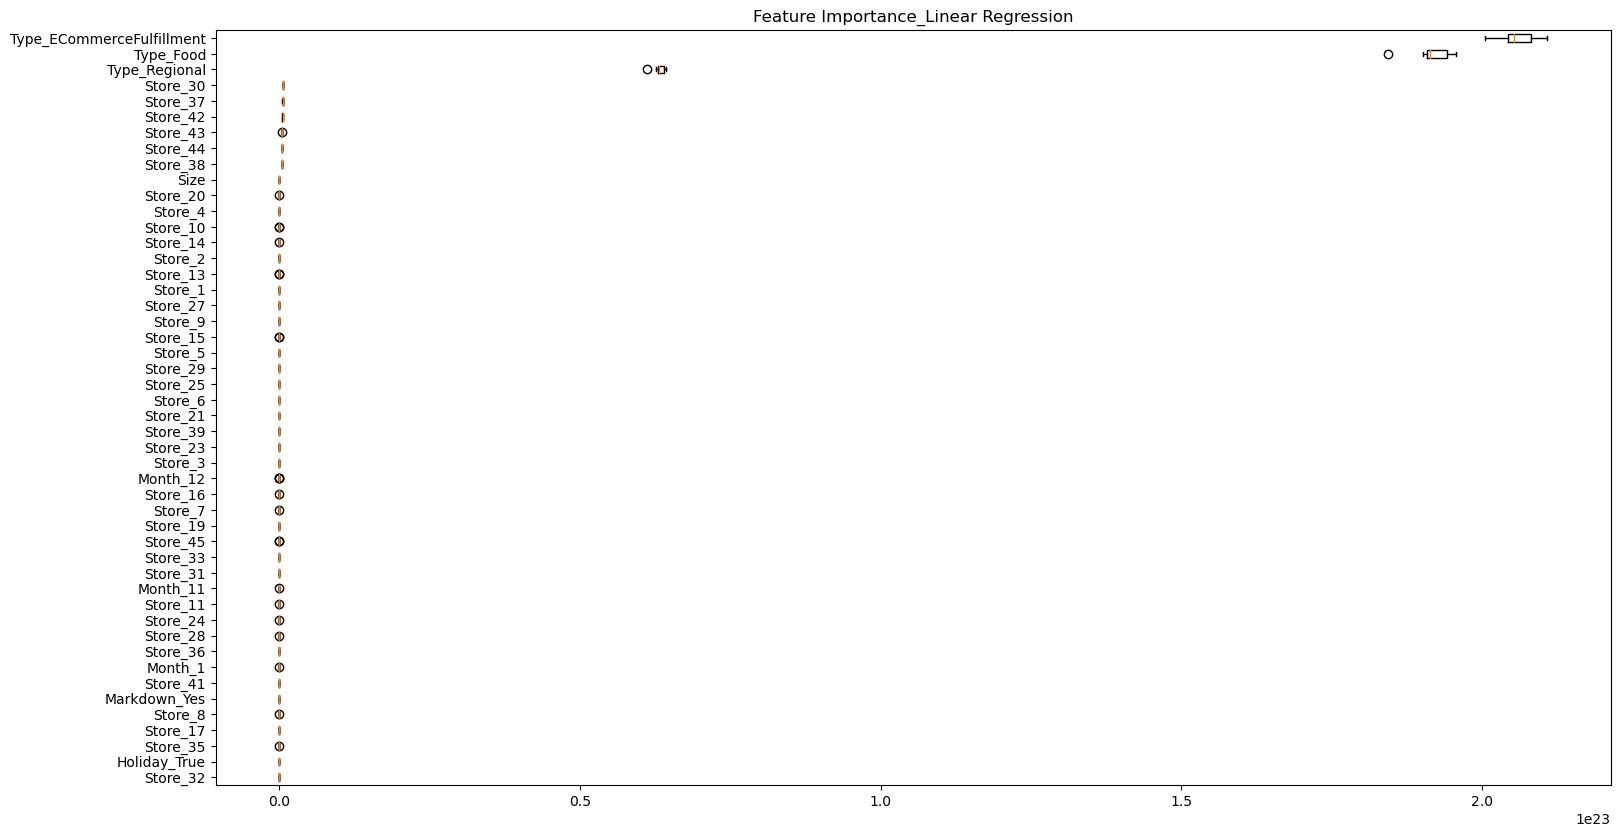

In [86]:
plt.figure(figsize=(18,10),dpi=100)
from sklearn.inspection import permutation_importance

result = permutation_importance(lr, x_train, y_train, n_repeats=10, random_state=22)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=x_train.columns[perm_imp_idx])
plt.title('Feature Importance_Linear Regression')


plt.show()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def cal_vif(dataset):
    vif=pd.DataFrame()
    vif["features"]=dataset.columns
    vif["Vif_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return(vif)

In [89]:
xpca_train=x_train

In [90]:
VIF=cal_vif(xpca_train).sort_values(by="Vif_value",ascending=False)
VIF.head()

,features,Vif_value
32,Store_38,inf
31,Store_37,inf
25,Store_30,inf
35,Store_42,inf
36,Store_43,inf


# PRINCIPAL COMPONENT ANALYSIS

In [91]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(xpca_train)
pca_data=pca.transform(xpca_train)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
print(per_var)

[24.4 11.2 11.   4.4  3.4  3.   2.7  1.8  1.2  1.2  1.1  1.1  1.1  1.1
  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
  1.1  1.1  1.1  1.1  1.1  1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   0.2  0.2  0.   0.   0. ]


In [92]:
per_var=pd.DataFrame(per_var)

In [94]:
df_p=pd.DataFrame(xpca_train.columns)
df_p["per_var"]=per_var
df_p.head(10)

,0,per_var
0,Store_1,24.4
1,Store_2,11.2
2,Store_3,11.0
3,Store_4,4.4
4,Store_5,3.4
5,Store_6,3.0
6,Store_7,2.7
7,Store_8,1.8
8,Store_9,1.2
9,Store_10,1.2


In [95]:
df_p.loc[[0],[0]]

,0
0,Store_1


In [97]:
l2=[]
for i in range(0,len(df_p)):

    j=df_p.loc[[i],[0]]
    if df_p.loc[[i],["per_var"]].values>2:
       
        l2.append(j)
        
        
print(l2)

[         0
0  Store_1,          0
1  Store_2,          0
2  Store_3,          0
3  Store_4,          0
4  Store_5,          0
5  Store_6,          0
6  Store_7]


In [98]:
new_x_train=x_train[["Store_1","Store_2","Store_3","Store_4","Store_5","Store_6","Store_7"]]
new_x_test=x_test[["Store_1","Store_2","Store_3","Store_4","Store_5","Store_6","Store_7"]]

In [99]:
new_x_train.columns

Index(['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7'],
      dtype='object')

In [100]:
lr.fit(new_x_train,y_train)
y_pred=lr.predict(new_x_test)
round(metrics.r2_score(y_test.values,y_pred),2)

0.24

In [101]:
round(metrics.mean_absolute_percentage_error(y_test.values,y_pred),2)

0.54

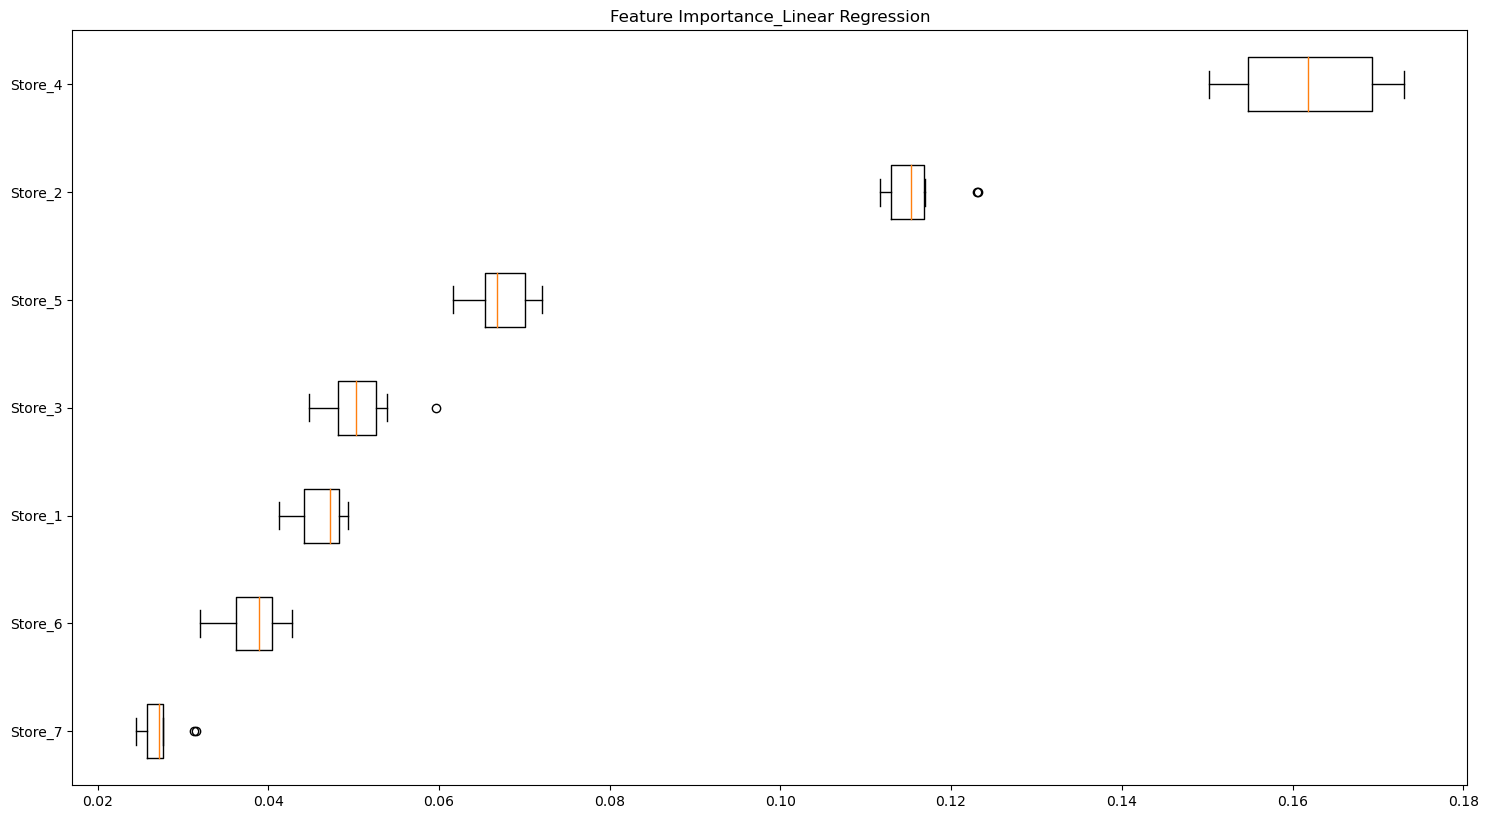

In [97]:
plt.figure(figsize=(18,10),dpi=100)
from sklearn.inspection import permutation_importance

result = permutation_importance(lr, new_x_train, y_train, n_repeats=10, random_state=22)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=new_x_train.columns[perm_imp_idx])
plt.title('Feature Importance_Linear Regression')


plt.show()

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [103]:
results=rf.fit(x_train,y_train.values.ravel())

In [104]:
yrf=rf.predict(x_test)

In [105]:
round(metrics.r2_score(y_test.values,yrf),2)

0.92

In [106]:
round(metrics.mean_absolute_percentage_error(y_test.values,yrf),2)

0.08

In [107]:
ans=rf.predict(X)
validation_set["Total_Sales"]=ans

In [108]:
validation_set.head(5)

,Date,Temperature,Fuel_Price,CPI,Unemployment_Rate,Total_Sales,Size,Store_1,Store_2,Store_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
4545,2019-01-12,0.484708,0.476885,0.062609,0.853595,4.171899e+05,0.026063,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4546,2019-01-12,0.194224,0.403468,0.748898,0.559004,5.874827e+05,0.193984,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4547,2019-01-12,0.287620,0.546654,0.141714,0.742278,5.158274e+05,0.318073,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4548,2019-01-12,0.298070,0.688237,0.186462,0.611858,1.515190e+06,0.916437,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4549,2019-01-12,0.399149,0.294358,0.985491,0.233626,8.228559e+05,0.650636,0,0,0,...,0,0,0,0,0,0,0,0,0,0


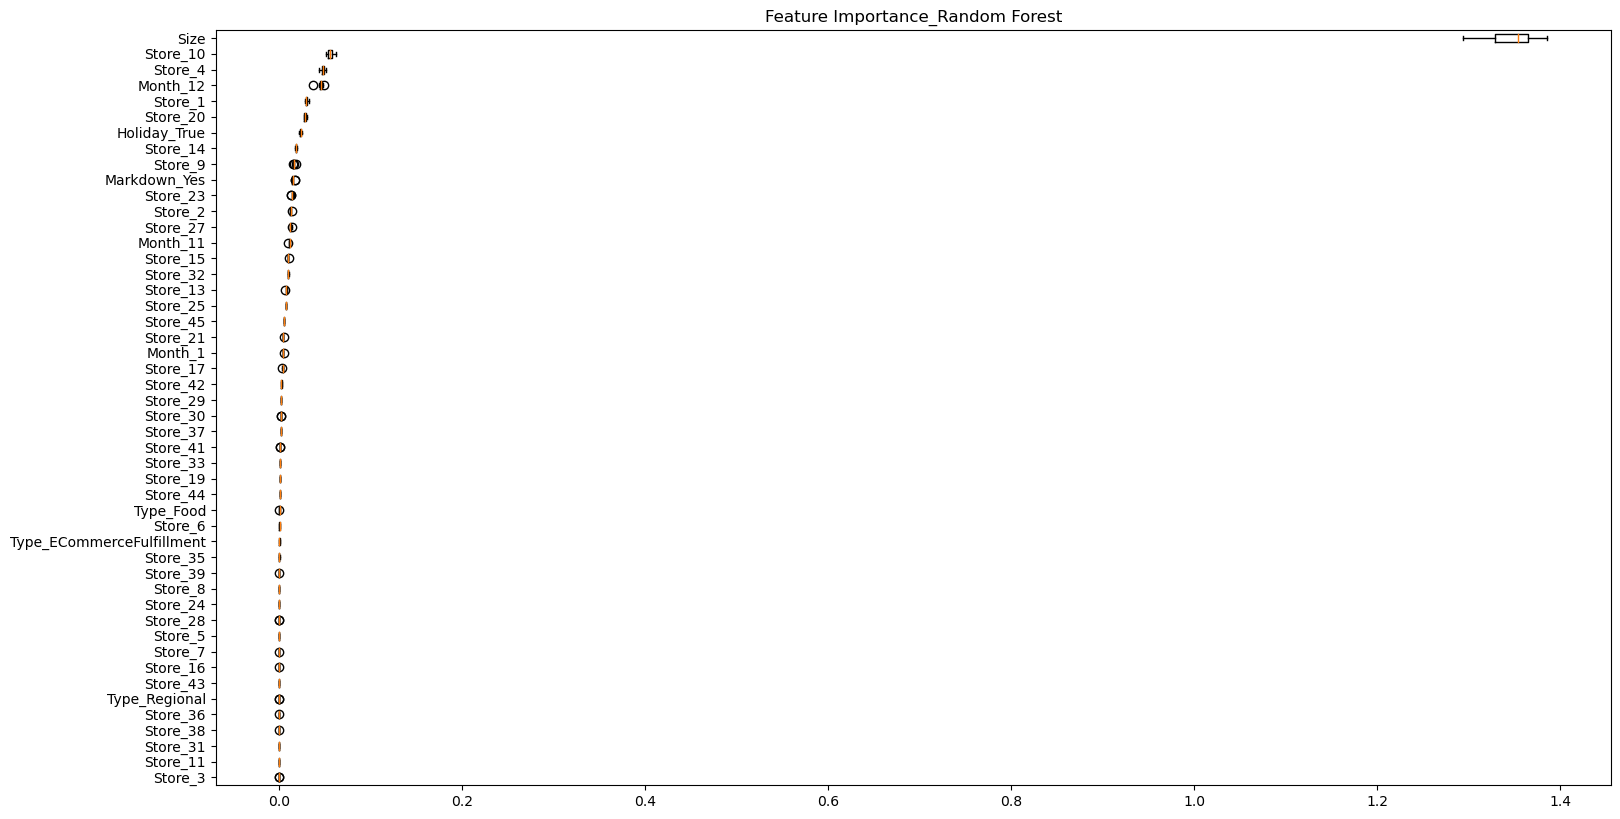

In [109]:
plt.figure(figsize=(18,10),dpi=100)


result = permutation_importance(rf, x_train, y_train, n_repeats=10, random_state=22)

perm_imp_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_imp_idx].T, vert=False,
            labels=X.columns[perm_imp_idx])
plt.title('Feature Importance_Random Forest')


plt.show()

In [113]:
validation_set.to_csv("Validation.csv")